# Bias-Variance trade-off demo

## Imports and Helper functions

In [49]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor


def show_plot(x_label, y_label, title):
    label_plot(x_label, y_label, title)
    plt.show()

    
def label_plot(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    

def plot_graph(x, y, alpha=1, cl="blue"):  
    plt.plot(x, y, alpha=alpha, color=cl)  

    
def eval_fxn(data_eqn, x):
    return eval(data_eqn)


def data_graph(data_eqn, x_range, alpha=1):
    y = eval_fxn(data_eqn, x_range)
    plot_graph(x_range, y, alpha)
    

def prepare_training_sets(formula, x_range, num_samps, num_sets):
    X_tr = np.zeros((num_sets, num_samps))
    Y_tr = np.zeros((num_sets, num_samps))
    
    print X_tr.shape
    
    x_left = x_range[0]
    x_right = x_range[-1]
    x = x_left
    y_left = eval(formula)
    x = x_right
    y_right = eval(formula)
    noise_std_dev = 0.3 * (y_right - y_left)
    
    for i in range(num_sets):
        X_tr[i] = np.random.uniform(x_left,x_right,num_samps)
        Y_tr[i] = eval_fxn(formula, X_tr[i]) + np.random.normal(0,noise_std_dev,num_samps)
        
    X_te = np.random.uniform(x_left,x_right,num_samps/5)
    Fx_te = eval_fxn(formula, X_te)
    eps_te = np.random.normal(0,noise_std_dev,num_samps/5)
    Y_te = Fx_te + eps_te
    
    return X_tr, Y_tr, X_te, Y_te, Fx_te, eps_te
        


def draw_dot_plot(formula, x_range, x, y):
    num_samps = len(x)
    plt.plot(x, y, 'ob')
    
    data_graph(formula, x_range, alpha=0.3)
    
    show_plot("X", "Y",' Num samples = ' + str(num_samps))

## Y = f(X) i.e. the data curve (without noise) =  0.05x³ - 0.02x² - 0.01x + 1

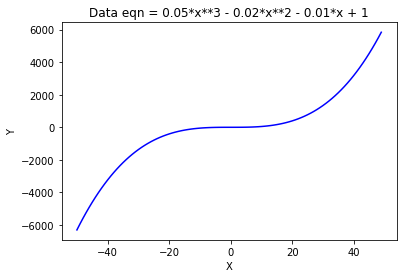

In [50]:
data_eqn = '0.05*x**3 - 0.02*x**2 - 0.01*x + 1'
x_range = np.arange(-50,50)

data_graph(data_eqn, x_range)
show_plot("X","Y", 'Data eqn = ' + data_eqn)

### Sample 20 training sets containing 40 points each and 1 test set containing 8 points with added Gaussian Noise

(20, 40)


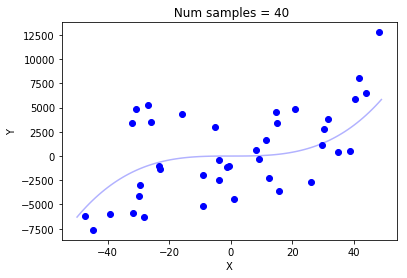

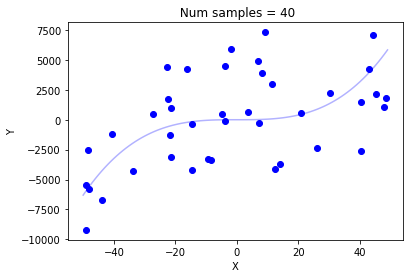

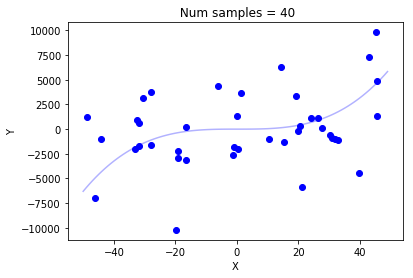

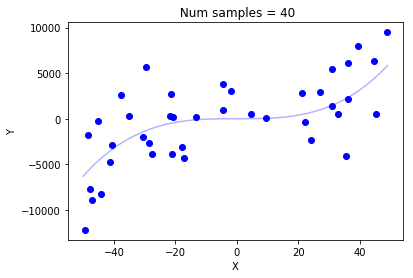

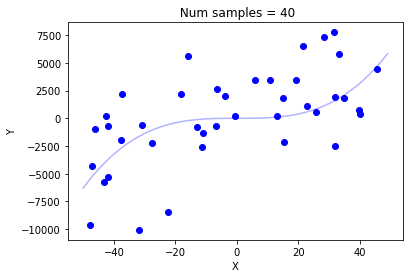

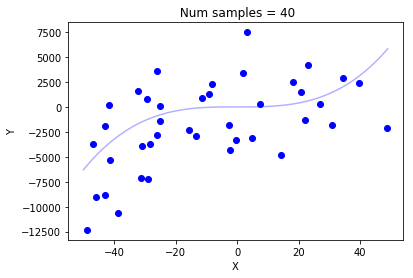

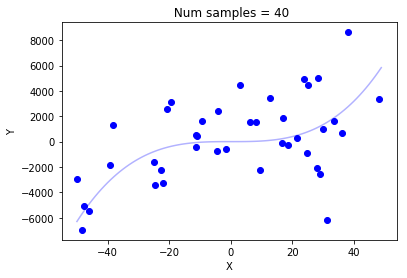

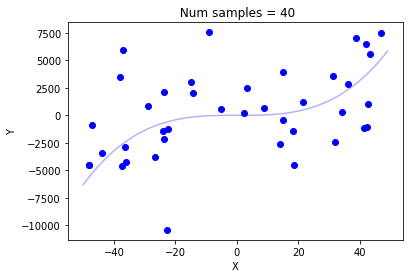

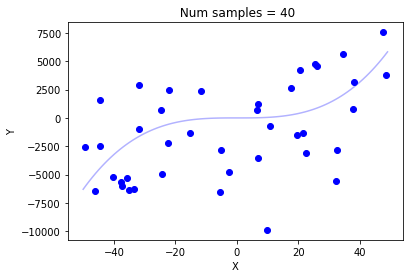

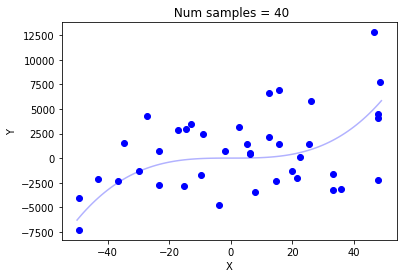

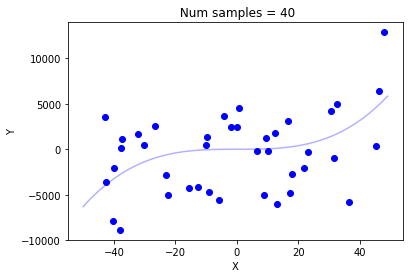

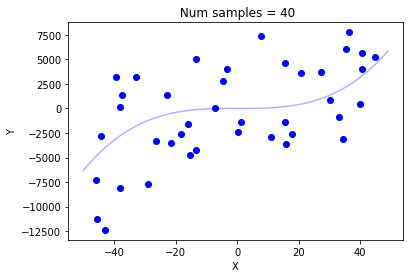

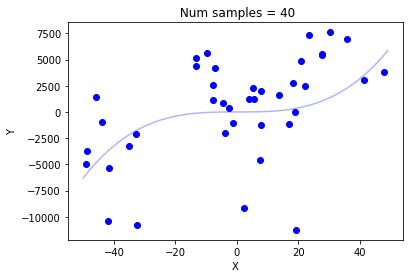

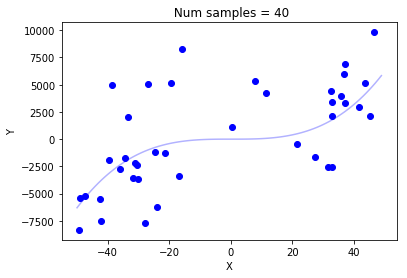

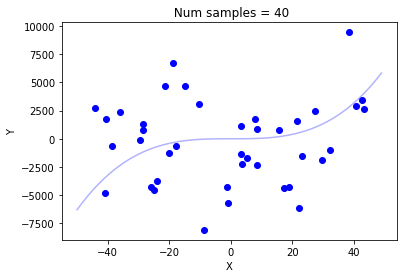

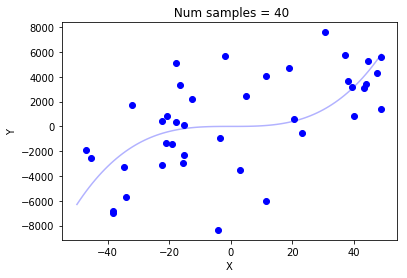

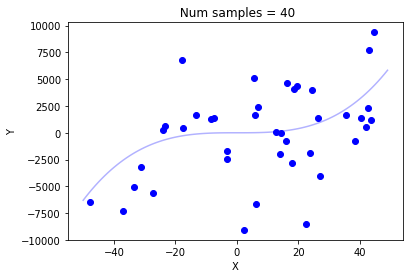

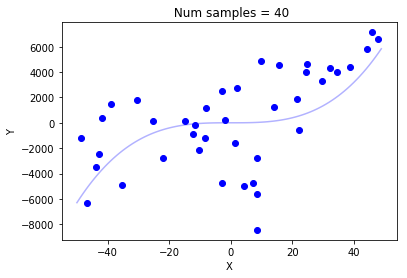

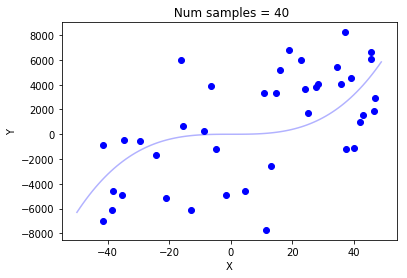

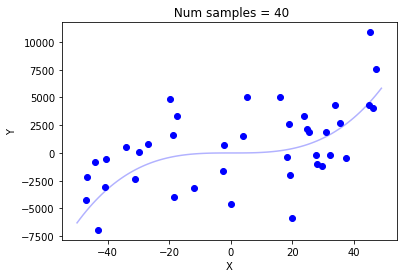

---------------------- Test set Below ----------------------


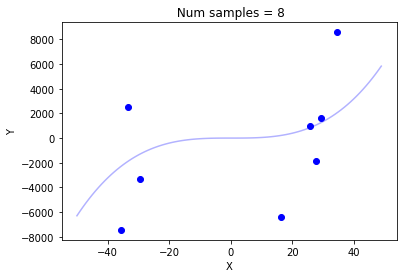

In [58]:
# Sampling data with noise
num_samps = 40
num_sets = 20 

X_tr, Y_tr, X_te, Y_te, Fx_te, eps_te = prepare_training_sets(data_eqn, x_range, num_samps, num_sets)


for i in range(num_sets):
    #draw_dot_plot_subplot(data_eqn, x_range, X_tr[i], Y_tr[i], 10, 2, i+1)
    draw_dot_plot(data_eqn, x_range, X_tr[i], Y_tr[i])
    
print "---------------------- Test set Below ----------------------"

draw_dot_plot(data_eqn, x_range, X_te, Y_te)

## Fit Ridge Regression model on each training set

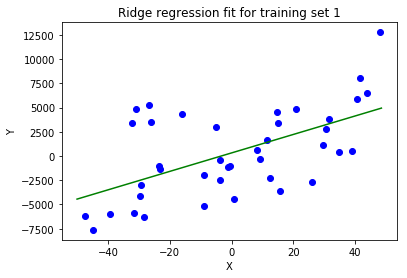

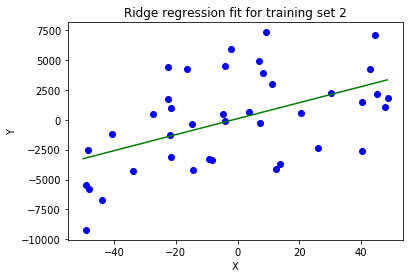

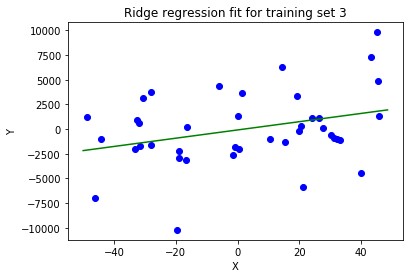

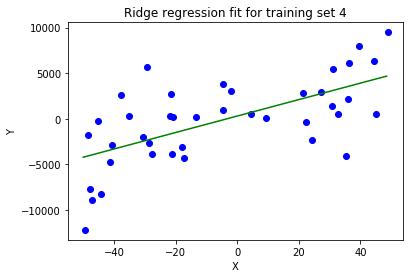

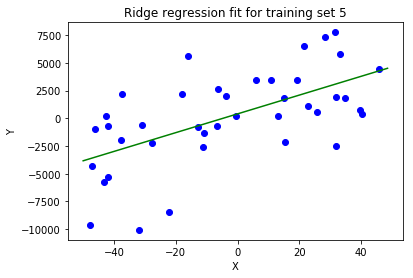

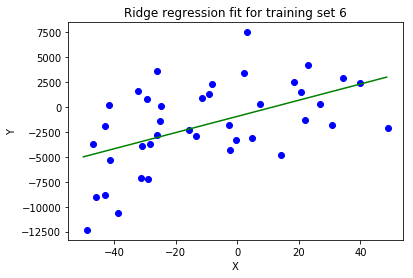

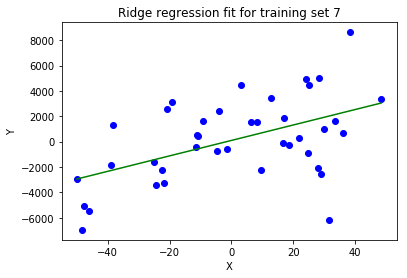

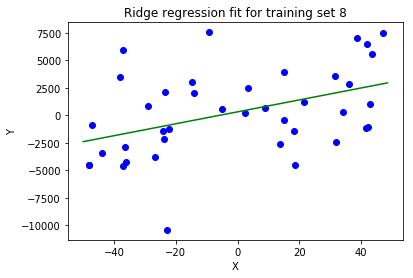

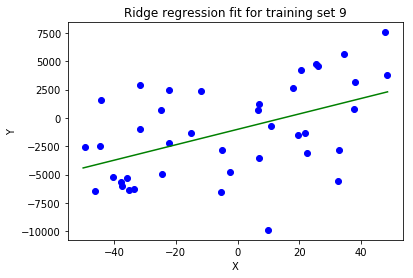

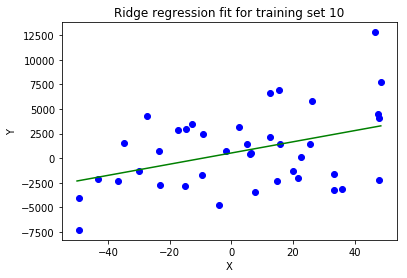

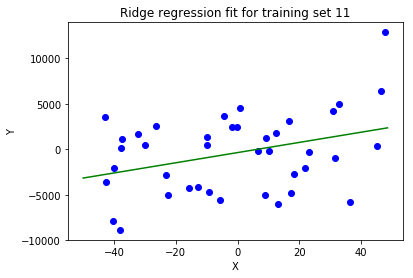

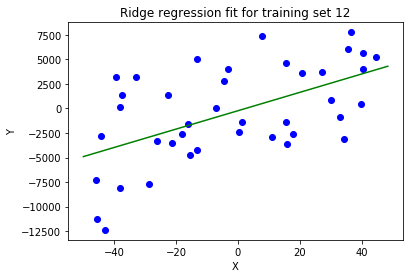

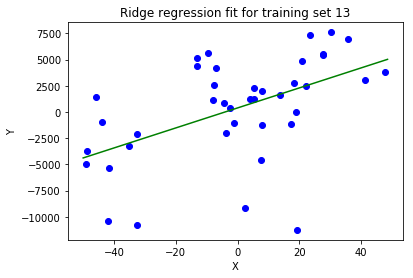

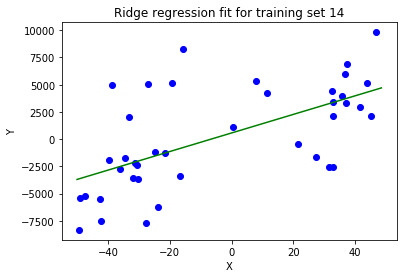

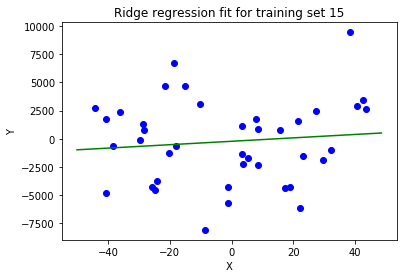

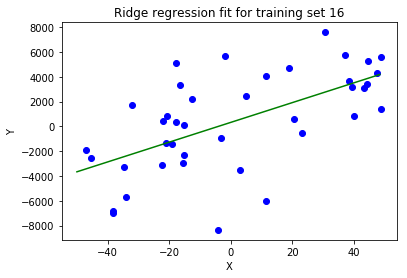

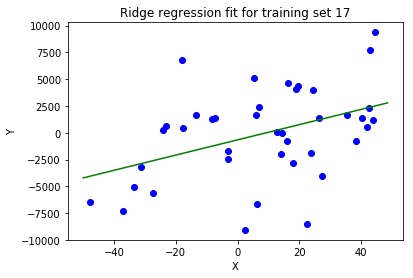

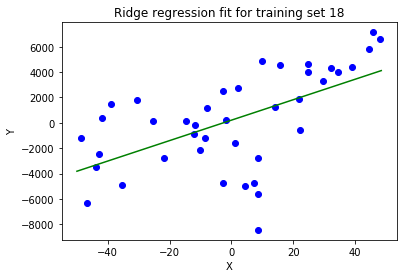

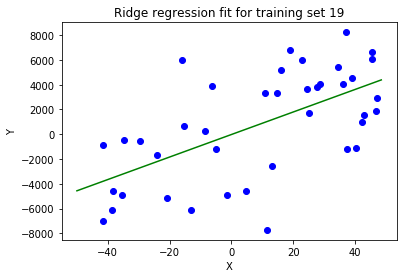

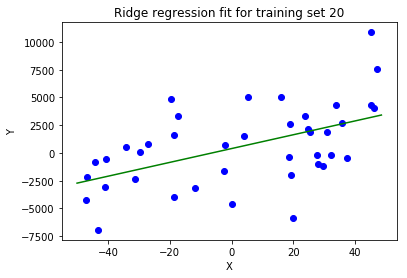

In [59]:
ridge_tr_models = []         # will contain Ridge models fit on the respective training sets

boundary_x_range = np.arange(x_range[0],x_range[-1], (x_range[-1] - x_range[0])/float(200))
ridge_boundary_y = np.zeros((num_samps, len(boundary_x_range)))


for i in range(num_sets):
    clf = Ridge(alpha=1.0)
    x = X_tr[i].reshape(-1,1)
    y = Y_tr[i].reshape(-1,1)
    ridge_tr_models.append(clf.fit(x, y))
    y_predict = clf.predict(boundary_x_range.reshape(-1,1))
    ridge_boundary_y[i] = y_predict.reshape(1,-1)
    

# Drawing the boundaries

for i in range(num_sets):
    plt.plot(X_tr[i], Y_tr[i], 'ob')
    plot_graph(boundary_x_range, ridge_boundary_y[i], cl='green')
    show_plot("X", "Y",'Ridge regression fit for training set ' + str(i+1))

### Visualizing each Ridge model against the test set and calculating average bias and variance

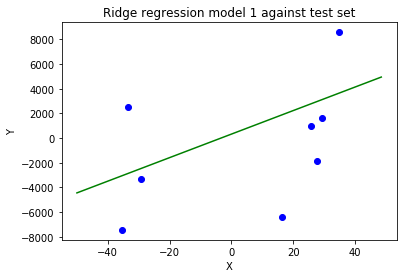

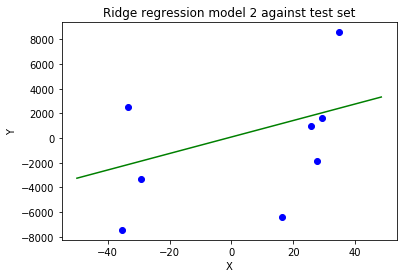

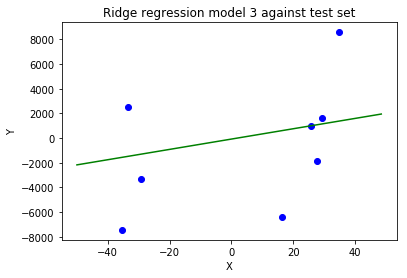

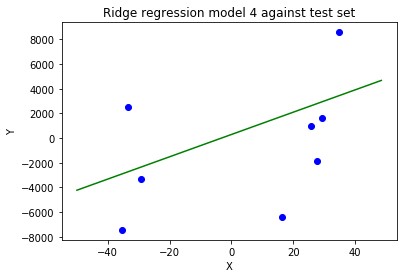

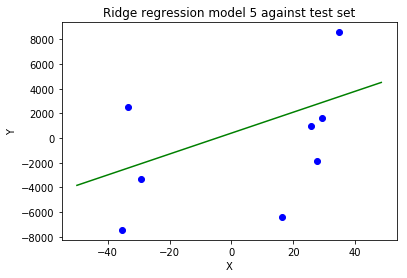

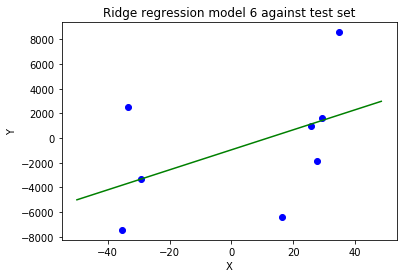

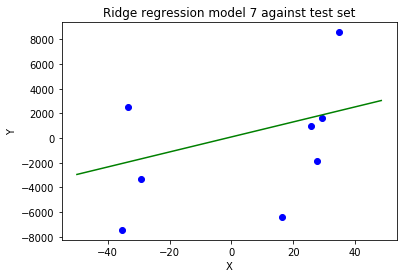

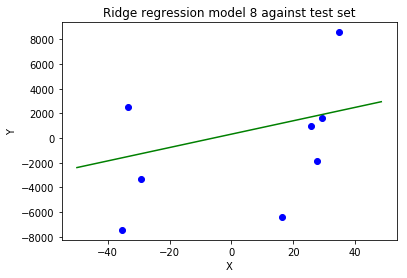

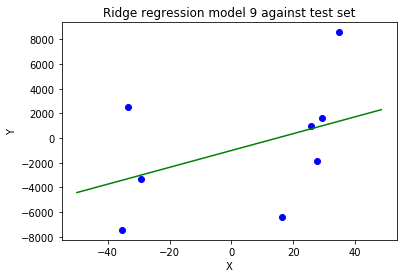

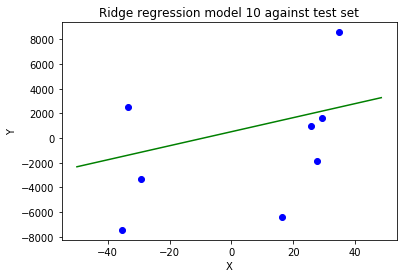

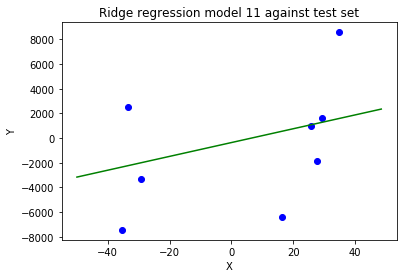

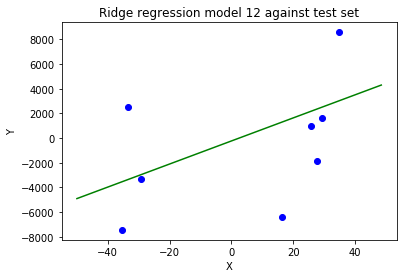

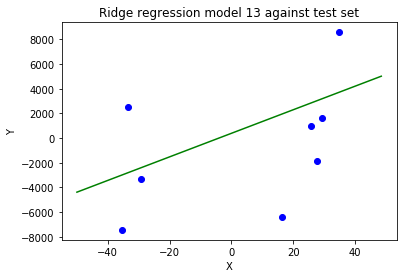

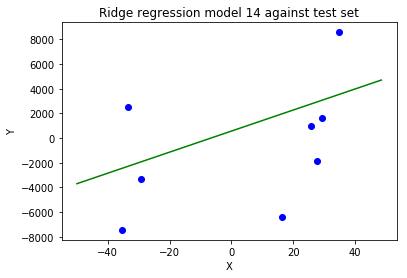

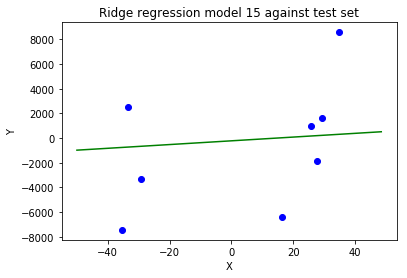

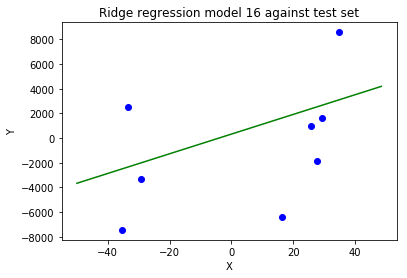

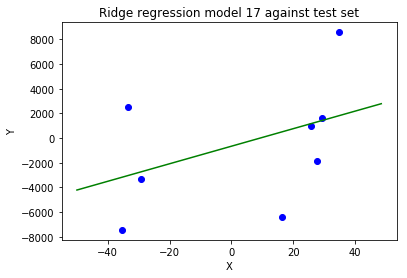

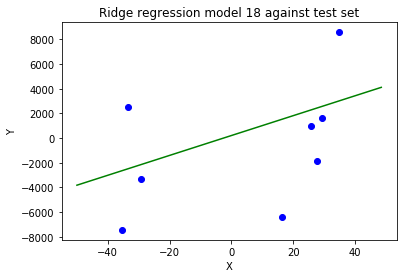

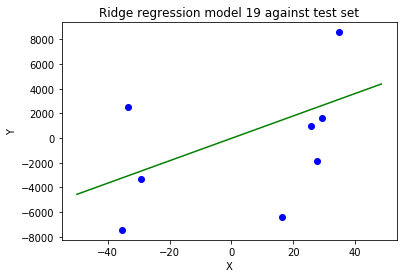

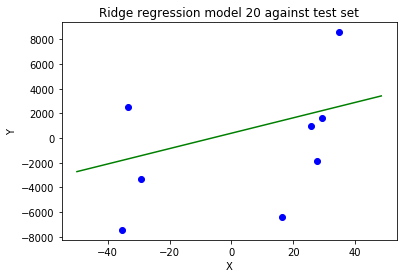

In [60]:
# Drawing the decision boundaries with test sets

for i in range(num_sets):
    plt.plot(X_te, Y_te, 'ob')
    plot_graph(boundary_x_range, ridge_boundary_y[i], cl='green')
    show_plot("X", "Y",'Ridge regression model ' + str(i+1) + ' against test set')
    

# Predictions by each classifier on the test set

num_te = len(Y_te)
ridge_pred_y_te = np.zeros((num_sets, num_te))

for i in range(num_sets):
    clf = ridge_tr_models[i]
    y_predict = clf.predict(X_te.reshape(-1,1))
    ridge_pred_y_te[i] = y_predict.reshape(1,-1)

### Bias and Variance estimates on the test set : Ridge Regression

In [61]:
# Bias and Variance Calculation

E_F_x_hat_ridge = np.mean(ridge_pred_y_te,axis=0)
bias_ridge = E_F_x_hat_ridge - Fx_te
var_ridge = np.var(ridge_pred_y_te, axis=0)

# Average/Expected magnitude of bias and variance

bias_mod_ridge = np.mean(np.absolute(bias_ridge))

print "Ridge Regression Bias on test set : " + str(bias_mod_ridge)
print "Ridge Regression Variance on test set : " + str(np.mean(var_ridge))

Ridge Regression Bias on test set : 722.5864038184704
Ridge Regression Variance on test set : 568911.8597039343


## Fit K-Nearest Neighbor Regression model on each training set

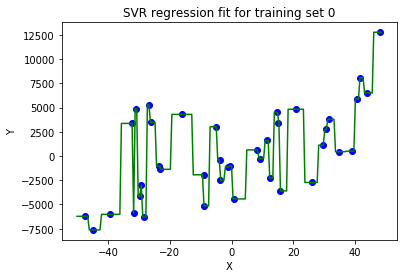

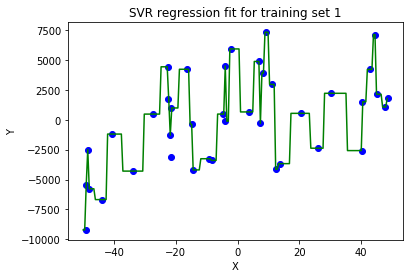

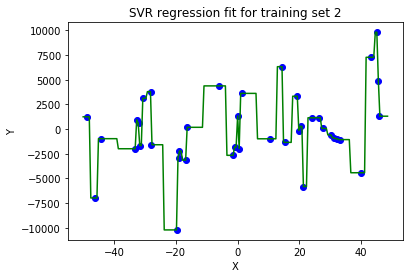

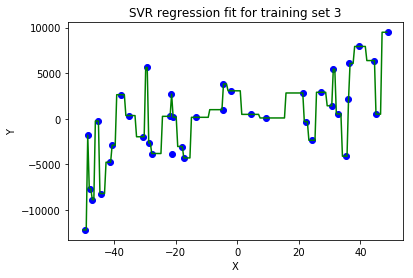

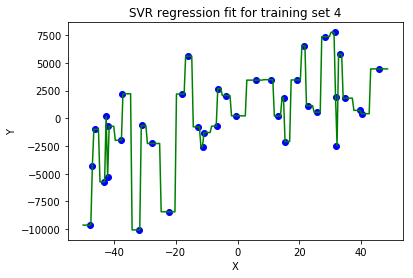

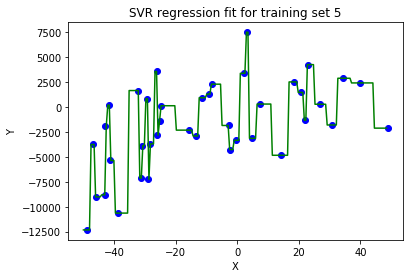

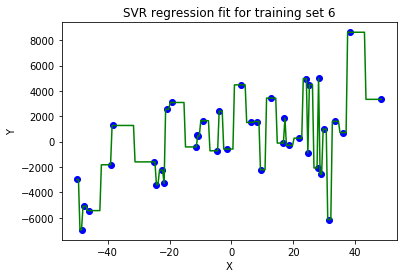

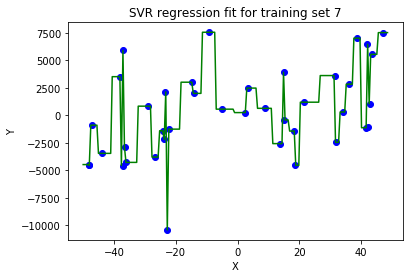

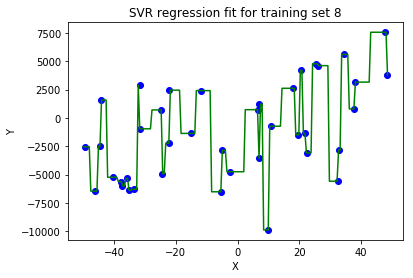

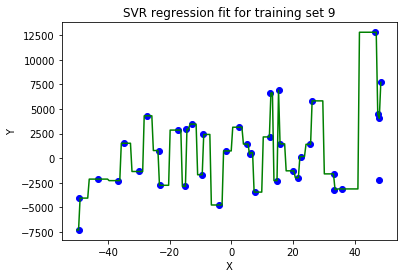

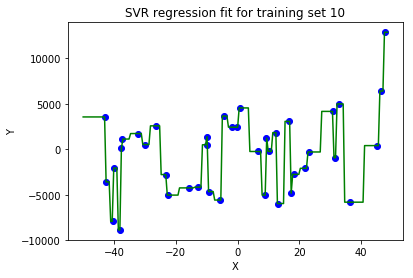

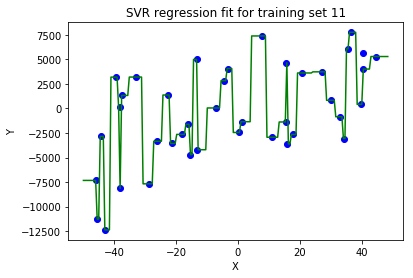

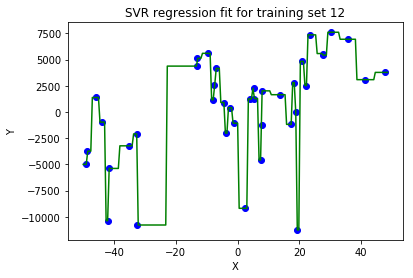

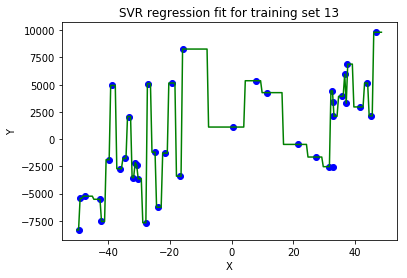

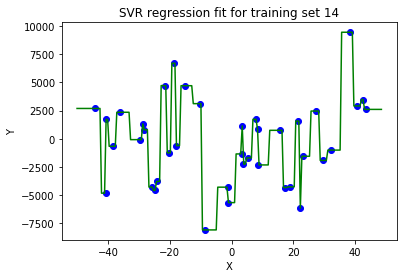

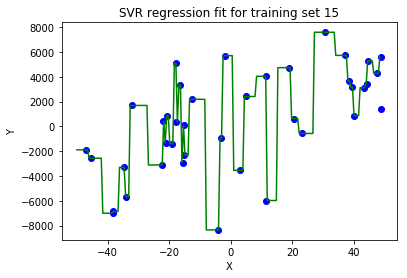

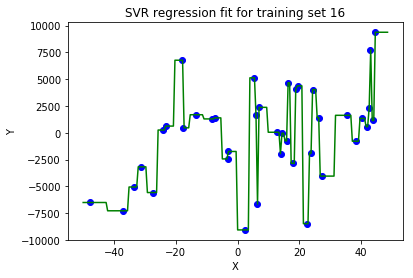

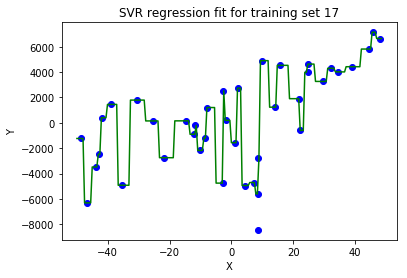

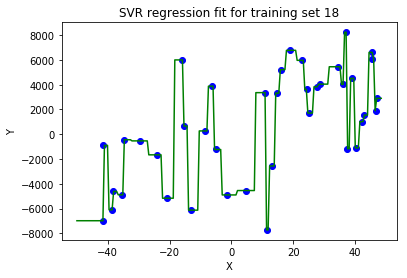

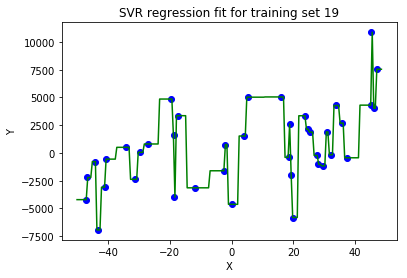

In [67]:
# Fitting SVR on the traning sets, calculating and plotting the decision boundary

knn_tr_models = []         # will contain Ridge models fit on the respective training sets
boundary_x_range = np.arange(x_range[0],x_range[-1], (x_range[-1] - x_range[0])/float(200))
knn_boundary_y = np.zeros((num_samps, len(boundary_x_range)))

for i in range(num_sets):
    clf = KNeighborsRegressor(n_neighbors=1)
    x = X_tr[i].reshape(-1,1)
    y = Y_tr[i].reshape(-1,1)
    knn_tr_models.append(clf.fit(x, y))
    y_predict = clf.predict(boundary_x_range.reshape(-1,1))
    knn_boundary_y[i] = y_predict.reshape(1,-1)

# Drawing the boundaries

for i in range(num_sets):
    plt.plot(X_tr[i], Y_tr[i], 'ob')
    plot_graph(boundary_x_range, knn_boundary_y[i], cl='green')
    show_plot("X", "Y",'SVR regression fit for training set ' + str(i))

### Visualizing each KNN model against the test set and calculating average bias and variance


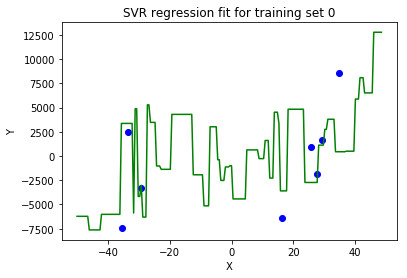

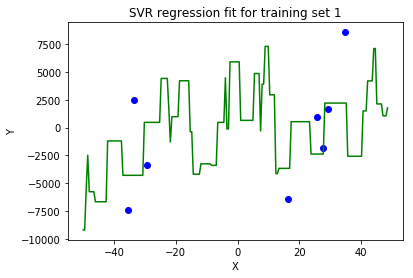

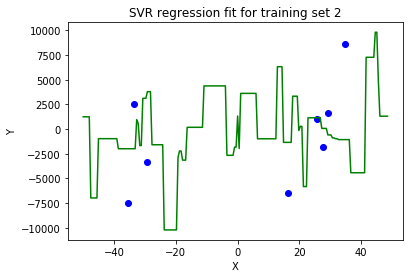

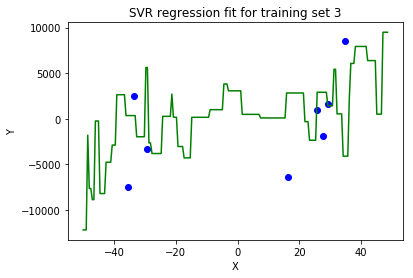

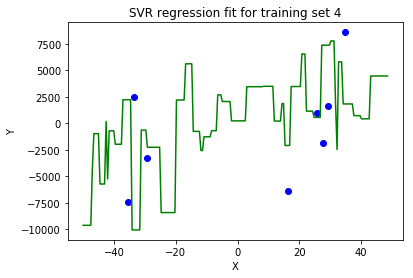

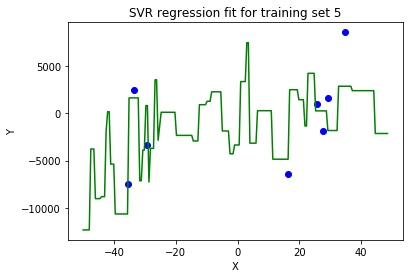

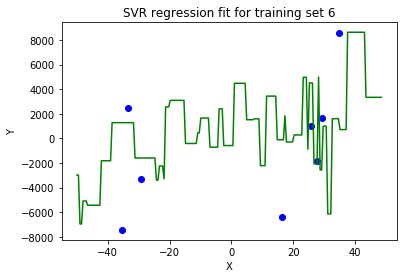

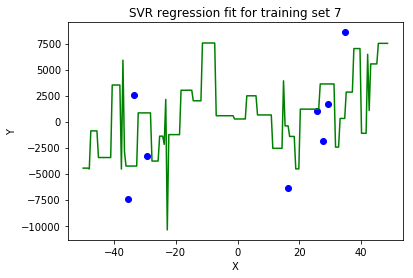

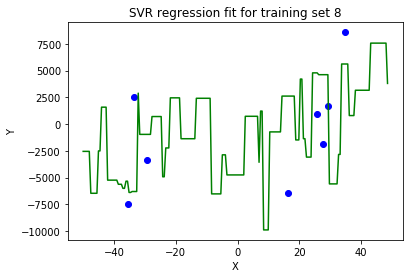

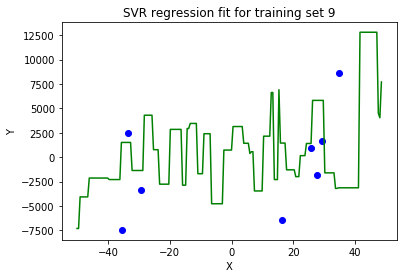

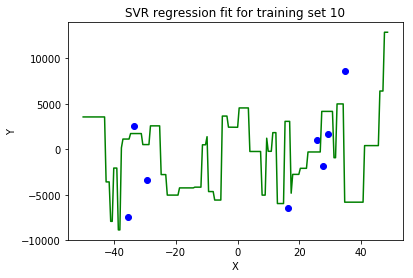

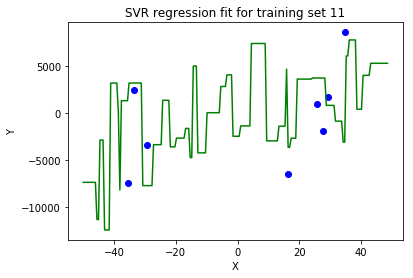

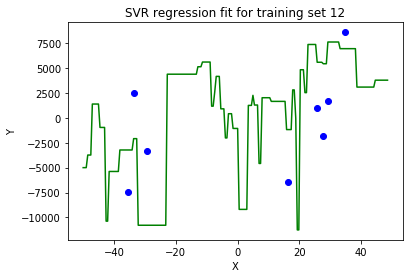

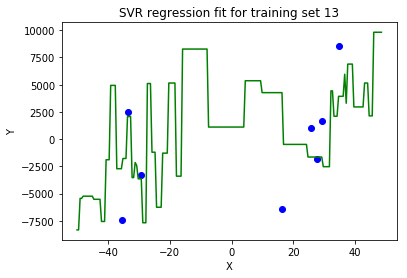

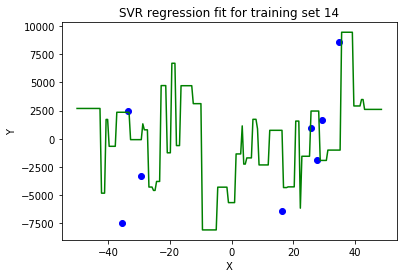

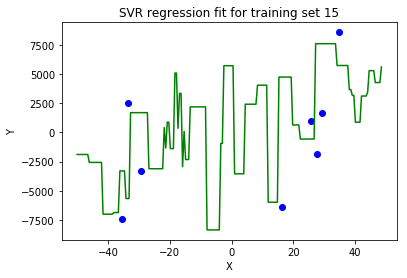

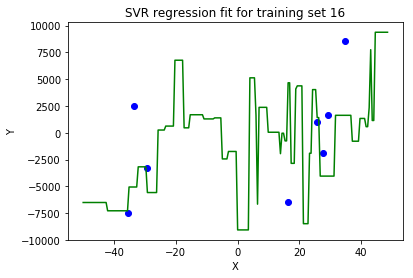

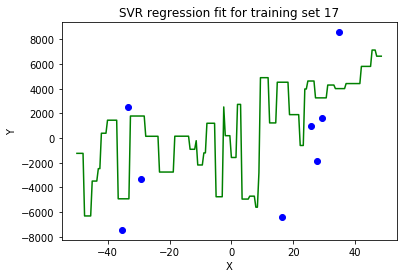

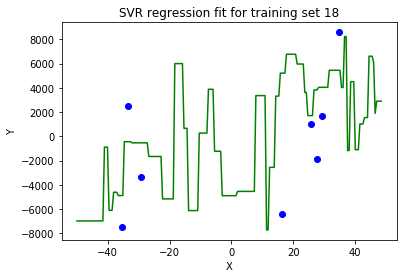

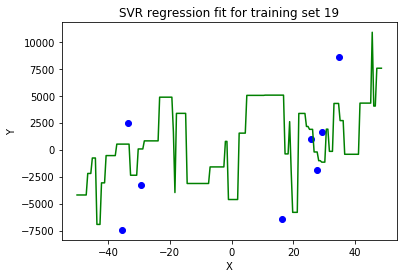

In [68]:
# Drawing the decision boundaries with test sets

for i in range(num_sets):
    plt.plot(X_te, Y_te, 'ob')
    plot_graph(boundary_x_range, knn_boundary_y[i], cl='green')
    show_plot("X", "Y",'SVR regression fit for training set ' + str(i))
    

# Predictions by each classifier on the test set

num_te = len(Y_te)
knn_pred_y_te = np.zeros((num_sets, num_te))

for i in range(num_sets):
    clf = knn_tr_models[i]
    y_predict = clf.predict(X_te.reshape(-1,1))
    knn_pred_y_te[i] = y_predict.reshape(1,-1)

### Bias and Variance estimates on the test set : KNN Regressor

In [72]:
knn_E_F_x_hat = np.mean(knn_pred_y_te,axis=0)
bias_knn = knn_E_F_x_hat - Fx_te

var_knn = np.var(knn_pred_y_te, axis=0)

# Average/Expected magnitude of bias and variance

bias_mod_knn = np.mean(np.absolute(bias_knn))

print "KNN Bias on test set : " + str(bias_mod_knn)
print "KNN Variance on test set : " + str(np.mean(var_knn))

KNN Bias on test set : 570.3499640585103
KNN Variance on test set : 11708755.435017584
